
<img src="2019-11-28_17-29-01.png">

## Импорт всех необходимых библиотек

In [1]:
import numpy as np                    # Математика и матрицы
from scipy import integrate           # Для нахождения интеграла
from matplotlib import pyplot as plt  # Построение графиков
import seaborn as sns                 # Красивый стиль графиков
sns.set()
from functools import reduce          # Функциональное программирование на python

In [2]:
from pylab import rcParams            # Увеличение размера графиков
rcParams['figure.figsize'] = 15, 15

# Инициализируем начальные условия задачи

## Обьявим функцию K(x,y)

In [3]:
def K(x,t):
    return 1 / (1 + (x - t)**2)

## Обьявим отрезки $ [a,b] $ и $ [\alpha,\beta] $

In [4]:
a, b = 0, 2
alpha, beta = 0.5, 1

## Обьявим функцию $ f(x_i) $ в точках $ x_i $

In [5]:
x_ = np.arange(0,2.2,0.2)                                                         #x_i
y_ = np.asarray([4.04, 4.16, 4.36, 4.64, 5, 5.44, 5.96, 6.56, 7.24, 7.48, 8])     #f(x_i)

In [6]:
N = x_.shape[0]      # число точек x_i

# Интерполируем функцию $ f(x_i) $ сплайнами 1- го порядка

## Найдем коэффициенты перед прямыми, которыми будем интерполировать $ f(x_i) $

In [7]:
def a_b_coefs(x=x_,y=y_):
    a = y.copy()
    b = (a[1:] - a[:-1]) / (x[1] - x[0])
    return a,b

## Создадим интерполяционную функцию f(x)

In [8]:
def f_func(x):
    a,b = a_b_coefs()
    for i in range(len(x_)-1):
        if x <= x_[i+1]:
            return a[i] + b[i] * (x - x_[i])
    return a[len(x_)-2] + b[len(x_)-2] * (x - x_[len(x_)-2])

# Составим квадратурную формулу метода Гаусса $$ \int_a^b f(x)dx \approx \sum_{i=0}^{n-1} c_i f(x_i)$$

## Узлы интегрирвания метода гаусса:

In [34]:
x_g = np.array([-0.9061798459, -0.5384693101, 0.0, 0.5384693101, 0.9061798459])
c_g = np.array([0.2369268851, 0.4786286706, 0.5688888888, 0.4786286706, 0.2369268851])

x_g = x_g * (b - a) / 2 + (a + b) / 2
c_g = c_g * (b-a) / 2
N = len(x_g)
# Точно для многочленов 9 степени

In [35]:
def integral(a,b,f):
    x_g = np.array([-0.9061798459, -0.5384693101, 0.0, 0.5384693101, 0.9061798459])
    c_g = np.array([0.2369268851, 0.4786286706, 0.5688888888, 0.4786286706, 0.2369268851])

    x_g = x_g * (b - a) / 2 + (a + b) / 2
    c_g = c_g * (b-a) / 2
    
    return np.sum(c_g * f(x_g))

In [9]:
x_g = np.array([-0.960290, -0.796666, -0.525532, -0.183435, 0.183435, 0.525532, 0.796666, 0.960290])
c_g = np.array([0.101229, 0.222381, 0.313707, 0.362684, 0.362684, 0.313707, 0.222381, 0.101229])

x_g = x_g * (b - a) / 2 + (a + b) / 2
c_g = c_g * (b-a) / 2
N = len(x_g)
# Точно для многочленов 15 степени

In [10]:
def integral(a,b,f):
    x_g = np.array([-0.960290, -0.796666, -0.525532, -0.183435, 0.183435, 0.525532, 0.796666, 0.960290])
    c_g = np.array([0.101229, 0.222381, 0.313707, 0.362684, 0.362684, 0.313707, 0.222381, 0.101229])

    x_g = x_g * (b - a) / 2 + (a + b) / 2
    c_g = c_g * (b-a) / 2
    
    return np.sum(c_g * f(x_g))

# Решение интегрального уравнения применением квадратурной формулы гаусса

## Составим СЛАУ вида $ u_N = B_nu_N + f_N $

### Составим матрицу $ B_N : b_{ij} = c_jK_{ij} $

In [36]:
B = np.zeros((N,N))                   # Инициализируем матрицу B нулями
for i in range(N):
    for j in range(N):
        B[i,j] = c_g[j] * K(x_g[i],x_g[j])

## Приведем уравнение к виду $ A_nu_N = f_n $

### Составим матрицу $ A_N $

In [37]:
# np.eye - единичная матрица
A = np.eye(N) - B

### Составим вектор $ f_N $

In [38]:
f = [f_func(x) for x in x_g]

## Построим метод Гаусса для решения СЛАУ

In [39]:
def solve_system(A,b):
    '''
    _A и _b создаются как копии т.к. исходная матрица и вектор передаются по ссылке
    '''
    _A = A.copy()
    _b = b.copy()
    
    for i in range(_A.shape[0]):
        for j in range(i+1,_A.shape[0]):
            mu = _A[j,i] / _A[i,i]
            _A[j,:] = _A[j,:] - _A[i,:] * mu
            _b[j] = _b[j] - _b[i] * mu
            
    _x = np.zeros((_A.shape[0]))
    _x[-1] = _b[-1] / _A[-1,-1]
    for i in range(_x.shape[0]-2,-1,-1):
        _x[i] = (_b[i] - _A[i,i+1:].dot(_x[i+1:])) / _A[i,i]
    return _x

### Найдем вектор $ u_N $

In [40]:
u = solve_system(A,f)

In [41]:
u

array([-12.42468015, -15.52607142, -15.90705617, -10.99065553,
        -6.47528731])

# Интерполируем решение интегрального уравнения с помощью формулы $$ u(x) = \sum_{j=0}^N{c_jK(x,x_j)u(x_j)} + f(x) ,   \space \space  x\in [a,b] $$

In [42]:
def u_func(x):
    return np.sum(c_g * K(x,x_g) * u) + f_func(x)

## Построим график решения уравнения на отрезке [a,b]:

Text(0, 0.5, 'u(x)')

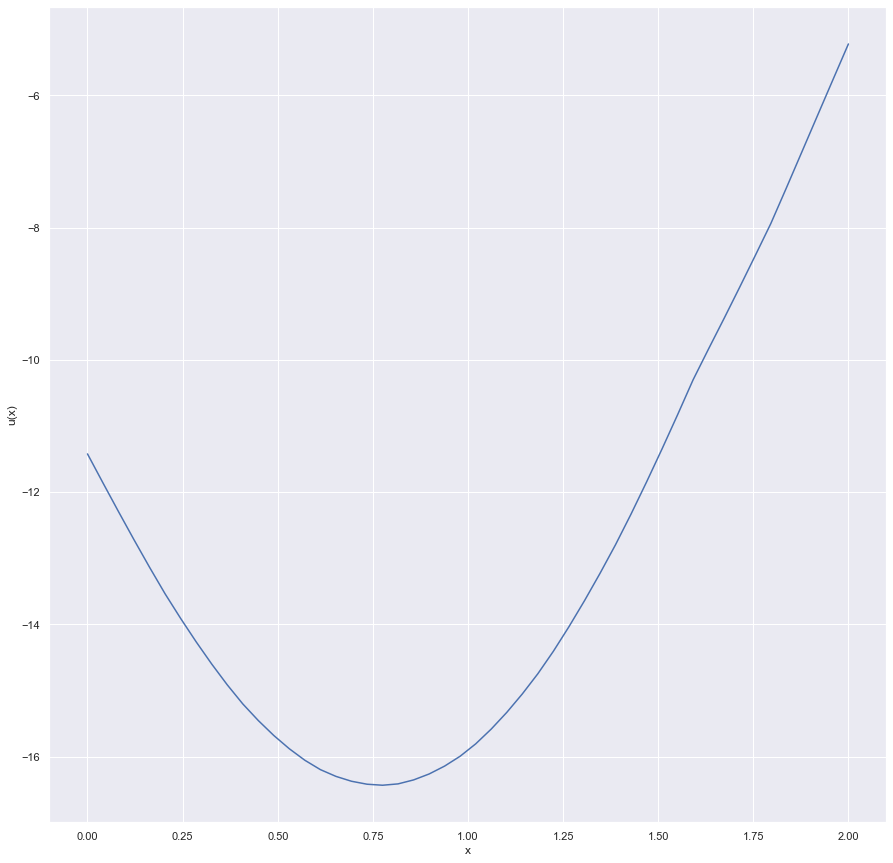

In [43]:
t = np.linspace(a,b,50)
Y = np.array(list(map(u_func,t)))
plt.plot(t,Y)
plt.xlabel('x')
plt.ylabel('u(x)')

# Посчитаем невязку $$ u(x) - \lambda\int_a^bK(x,t)u(t)dt - f(x) $$

## Методом Гаусса

In [44]:
def ku(x,t):
    return K(x,t) * np.array(list(map(u_func,t.tolist())))

def v(x):
    return u_func(x) - integral(a,b,lambda t: ku(x,t)) - f_func(x)

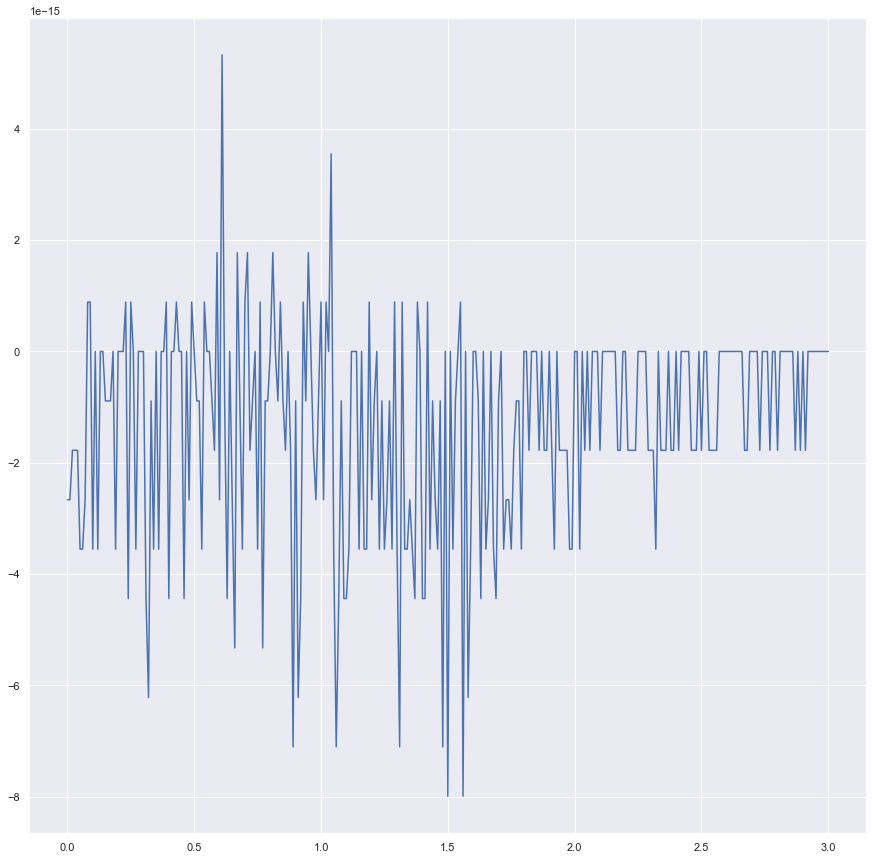

In [45]:
h=0.01
x = [i*h for i in range(int(3/h)+1)]
y = list(map(v,x))
plt.plot(x,y)

## Втроенным методом библиотеки scipy

In [46]:
from scipy.integrate import quad

In [47]:
def ku(x,t):
    return K(x,t) * u_func(t)

def v(x):
    return abs((u_func(x) - quad(lambda t: ku(x,t),a,b) - f_func(x))[0])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """


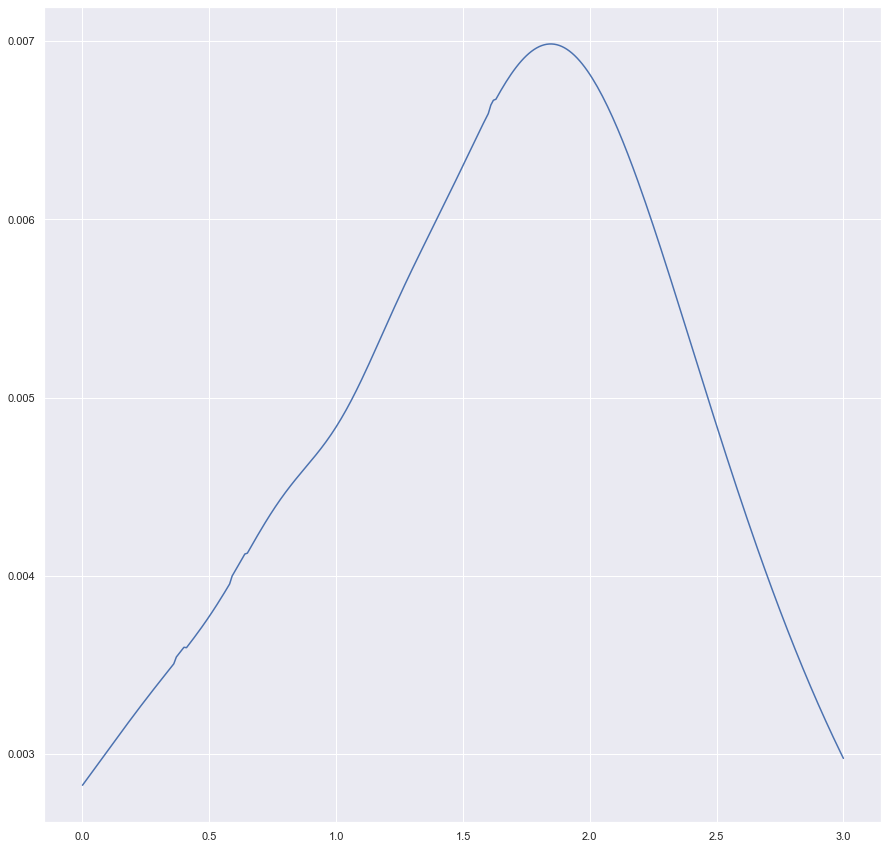

In [29]:
h=0.01
x = [i*h for i in range(int(3/h)+1)]
y = list(map(v,x))
plt.plot(x,y)

In [30]:
print('Максимальная невязка достигается в точке ',x[y.index(max(y))],' и равняется ',max(y))

Максимальная невязка достигается в точке  1.85  и равняется  0.006984451777126921


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """


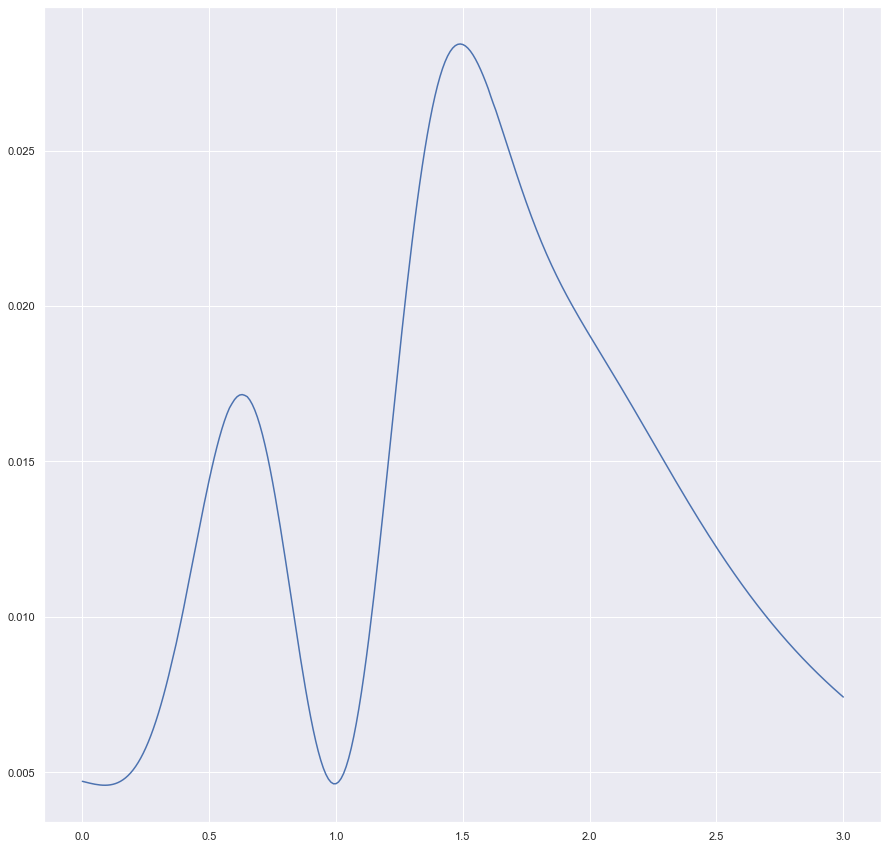

In [48]:
h=0.01
x = [i*h for i in range(int(3/h)+1)]
y = list(map(v,x))
plt.plot(x,y)

In [49]:
print('Максимальная невязка достигается в точке ',x[y.index(max(y))],' и равняется ',max(y))

Максимальная невязка достигается в точке  1.49  и равняется  0.028430559751150497


## Невязка в узлах функции f(x)

In [31]:
d = 20

In [32]:
print('Максимальная невязка достигается в точке ',x[y.index(max(y[::d]))],' и равняется ',max(y[::d]))

Максимальная невязка достигается в точке  1.8  и равняется  0.006969164138086015


## В узлах метода Гаусса

In [33]:
x = x_g.tolist()
y = list(map(v,x))
print('Максимальная невязка достигается в точке ',x[y.index(max(y))],' и равняется ',max(y))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """


Максимальная невязка достигается в точке  1.796666  и равняется  0.006966858704963386


# Соединим все полученные выше результаты для нахождения решения исходного интегрального уравнения с произвольным параметром $ \lambda $

In [27]:
def SolveEquation(l,split_num=50):
    # Составим матрицу B
    B = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            B[i,j] = l * c_g[j] * K(x_g[i],x_g[j])
            
    # Составим матрицу A
    A = np.eye(N) - B
    
    # Найдем вектор u
    u = solve_system(A,f)
    
    # Интерполируем решение
    u_func = lambda t : np.sum(c_g * K(t,x_g) * u) + f_func(t)
    
    # Построим отрезок
    t = np.linspace(a,b,split_num)
    
    # Найдем решение на отрезке
    y = np.array(list(map(u_func,t)))
    
    # Возвращаем пару: точки отрезка, значение u в этих точках
    return t,y

## Зададим $ \lambda $ как n-ое количество точек на отрезке $ [\alpha,\beta] $

In [28]:
n= 1000
lambdas = np.linspace(alpha,beta,n)

### Построим график для каждого $ \lambda $ и посчитаем сумму значений $ u^\lambda $ для каждого параметра (таким образом мы найдем максимальное значение площади т.к. разбиение равномерное)

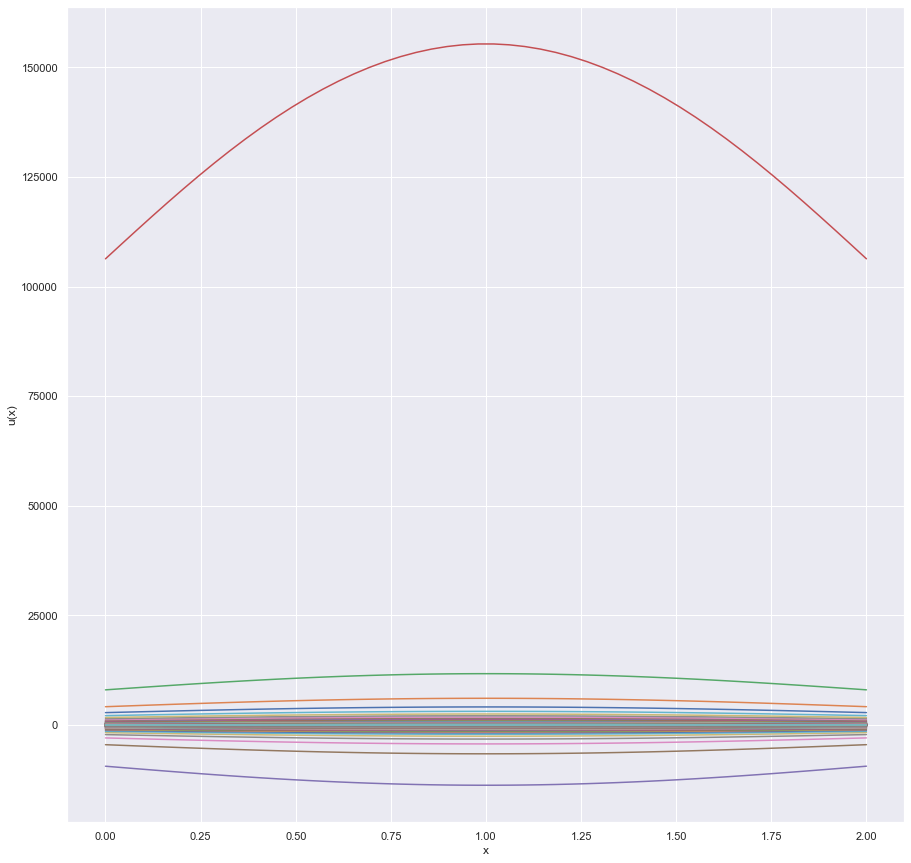

In [29]:
sum_of_u = []
for l in lambdas:
    x,y = SolveEquation(l)
    sum_of_u.append([l,np.sum(y)])
    plt.plot(t, y)
plt.xlabel('x')
plt.ylabel('u(x)')
sum_of_u = np.array(sum_of_u)

# Найдем значение лямбда при котором площадь криволинейной трапеции максимальна:

In [29]:
res = reduce(lambda a,b: a if (a[1] > b[1]) else b, sum_of_u)[0]          # Вычисляем макисмум
print('При lambda=',res,' площадь криволинейной трапеции максимальна')

При lambda= 0.7017017017017018  площадь криволинейной трапеции максимальна
